# Projet Mathématiques Informatique III: Probabilités

### Louis Perrotin
### Augustin Jacquillat 

Cher lecteur, Vous trouverez dans ce notebook des éléments de probabilités. Nous traitons la question de la longeur d'un câble sous marin. Etant fixés les deux point à relier, il nous faut estimer la profondeur du fond marin afin de choisir un câble de longeur apropriée.

Nous traiterons dans une première partie les questions théoriques qui nous permettront d'établir une bonne méthode de simulation implémentée dans la seconde partie de notre étude. 


# Questions théoriques 

### 1. Justification de l'approximation de l’espérance conditionnelle par la moyenne empirique de simulations conditionnelles

mystère 

### 2. Loi conditionnelle du vecteur des composantes de Z correspondant aux points de discrétisation sans observation, connaissant les valeurs prises par les composantes aux sites d’observation.

Notons Y le vecteur gaussien associé aux profondeurs inconnues, X celui associé aux profondeurs connues. 

La matrice de covariance de Z peut alors s'écrire :
$C=\begin{pmatrix}
   C_Y & C_{Y,X} \\
   C_{X,Y} & C_X 
\end{pmatrix}
$ où $C_{A,B}=cov(A,B)$ pour tous $A,B \in {X,Y} $
et 
$ C_Y=C_{Y,Y}$

$ C_X=C_{X,X} $. 

En notant $CS_Y$ le complément de Schlum du block $C_Y$, la loi conditionnelle de Y sachant X=x est :

$\mathbf{f_{Y|X=x}=\frac{1}{(2\pi)^{k/2}det(CS_Y)}exp(-\frac{1}{2}(y-m_{Y|X=x})^t CS_Y^{-1} (y-m_{Y|X=x}))}$
où $ m_{Y|X=x}=m_Y+C_{X,Y}C_X^{-1}(x-m_x) $

### 3. Loi du vecteur Z=m+RY
Si Y = (Y1, . . . , Yp) est un vecteur de composantes gaussiennes indépendantes, toutes d’espérance nulle et de variance 1. Soit Z le vecteur Z = m + RY où R est une matrice p × p et m est un vecteur de
taille p. 

Par linéarité de l'espérance: E(Z)=E(m)+E(RY)=m+0

Ainsi : $\mathbf{E(Z)=m}$


V(Z)=V(RY)=E((RY)²) $ \Rightarrow V(Z)=RR^t$.


Ainsi, Z suit une loi normale centrée en m de variance $ V(Z)=RR^t $

### 4. Algorithme de simulation conditionnelle 

On cherche, en reprenant les notations de la question 2 la loi de Y. 

On peut avoir cette loi si on a son espérance et sa variance puisuqe Y suit une loi normale. Il faut donc obtenir l'éspérance et la variance conditionnelle de Y sachant qu'on a certaines profondeurs. Notons $E_c$ l'espérance et la variance de $C_c$. On fait alors la décomposition de Cholesky de $C_c$ et on simule alors un vecteur gaussien centré réduit W. 

D'après la question 2, on a alors $ \mathbf{Y=E_c+RW}$ avec $C_c=RR^t$

# Questions de Simulation 

Forts de notre approche théorique, nous nous proposons une solution pratique au problème. 


Dans les lignes de codes qui suivent, nous initialisons Python et le modèle. 

In [3]:
#Chargement de dépendances

import numpy as np
import matplotlib.pyplot as plt

#Discrétisation
A=0
B=500
N=101 #Nombre de point de discrétisation
Delta=(B-A)/(N-1)
discretization_indexes = np.arange(N)
discretization = discretization_indexes * Delta

#Paramètres du modèle

mu = -5
a = 50
sigma2 = 12

#Données

observation_indexes = [0,20,40,60,80,100]
depth = np.array([0 ,-4 ,-12.8 ,-1 ,-6.5 ,0])

#Indices des composantes correspondant aux observations et aux composantes non observées

unknown_indexes = list(set(discretization_indexes)-set(observation_indexes))


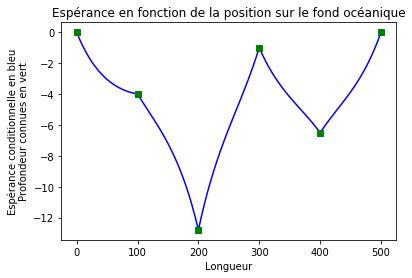

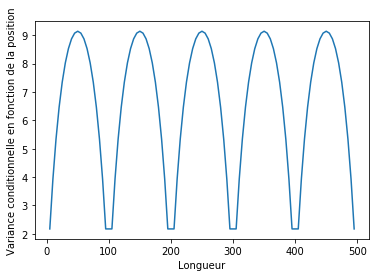

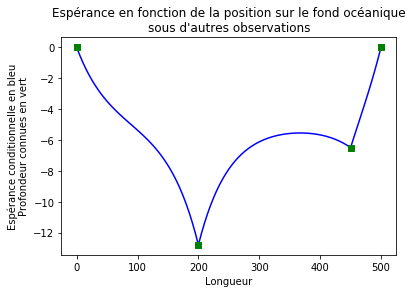

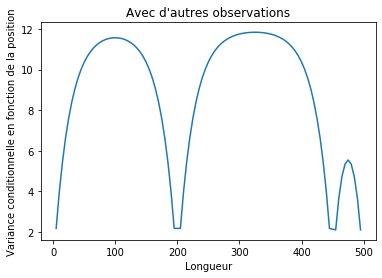

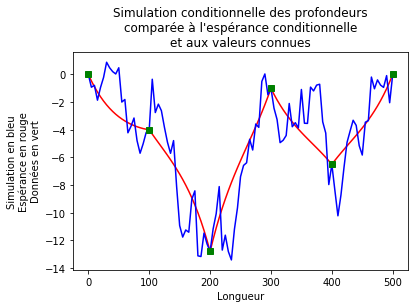

La longueur du cable de la simulation précédente est de 524.98 m (au centimètre près).
La longueur moyenne estimée est 522.19 m là où l'espérance conditionnelle nous donne 501.64 m(au centimètre près).


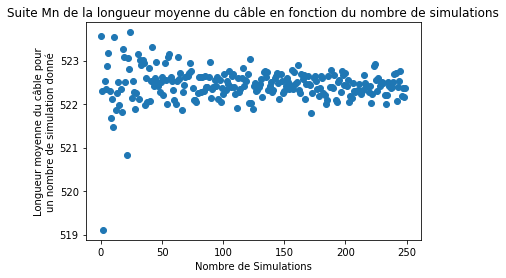

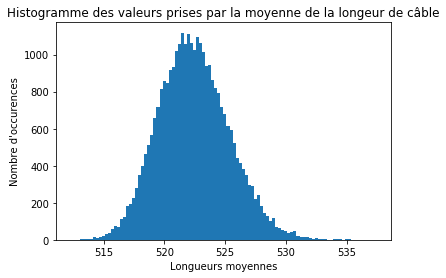

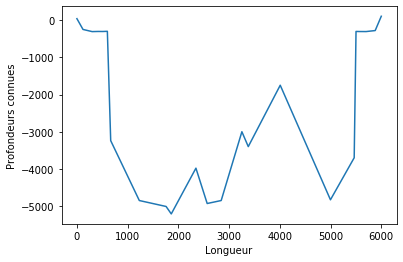

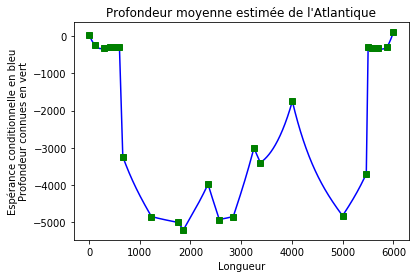

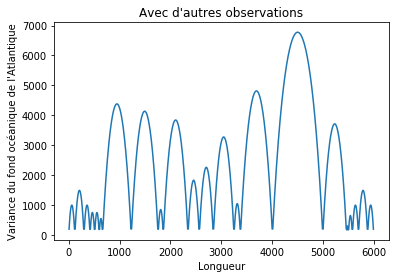

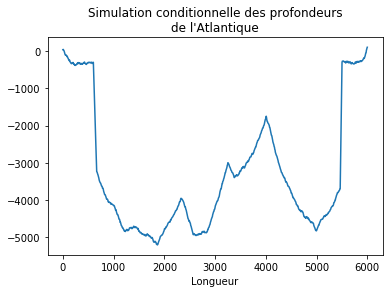

La longueur moyenne estimée est 25062 km là où l'espérance conditionnelle nous donne 21348 km (au kilomètre près) pour 100 simulations.


In [1]:


##5
'''
On va changer l'ordre des lignes et des colonnes de la matrice cov_Z pour avoir         [[Cc Cci]
                                                                                cov_Z=   [Cic Ci]]
de telle sorte que le calcul de l'espérance conditionnelle sera plus facile. On se base sur la formule page 13
du poly probabilités IV.
'''
esp_cond = np.zeros(len(unknown_indexes))+mu

esp_obs = (np.zeros(len(observation_indexes))+mu).T
Cc_inv = np.linalg.inv(cov_observation)
esp_cond += cov_inc_and_obs.dot(Cc_inv).dot((depth-esp_obs).T)

'''
On ajoute les valeurs mesurées
'''

esp_condBis = esp_cond.tolist()

for i in range(len(observation_indexes)):
    esp_condBis.insert(observation_indexes[i],depth[i])

plt.plot(discretization,esp_condBis,'b')
plt.plot(np.array(observation_indexes)*Delta,depth,'gs')
plt.xlabel('Longueur')
plt.title('Espérance en fonction de la position sur le fond océanique')
plt.ylabel('Espérance conditionnelle en bleu\nProfondeur connues en vert')
plt.show()

'''
On voit bien que la courbe bleue suit bien celle orange, ce qui est logique par rapport
à ce que l'on souhaite avoir de la variable aléatoire Z.
Par ailleurs, on remarque que si la courbe orange est supérieure à -5, l'espérance conditionnelle
va avoir tendance à être en dessous et inversement. C'est du au fait que l'espérance à la base
(ie non conditionnelle) est égale à -5
Les courbes ne se joignent pas au niveau des points d'observation car nous n'avons pas rajouté 
les observations dans la matrice d'espérance conditionnelle.
'''


##6
'''
On calcule de même la variance conditionnelle
'''

cov_cond=cov_inc - cov_inc_and_obs.dot(Cc_inv).dot(cov_inc_and_obs.T)

diag=[cov_cond[i,i] for i in range(len(unknown_indexes))]
plt.plot(np.array(unknown_indexes)*Delta,diag)
plt.xlabel('Longueur')
plt.ylabel('Variance conditionnelle en fonction de la position')
plt.show()
'''
C'est assez logique que la varianc conditionnelle oscille comme ça.
Les oscillations sont périodique uniquement parce que les observations sont prises à 
des positions régulières.
Ensuite, plus on va s'éloigner d'un point d'observation, plus la valeur de la profondeur
sera incertaine, et de même, plus on s'en rapproche, plus cette valeur est faible. On oscille donc 
entre variance forte et variance faible sur l'enseble de la longueur, puisqu'on a des
points d'observation réguliers, et ceci avec un symétrie entre deux points d'observation successifs
puisque la variance à la base est constante sur toute la longueur (cette constance e manifeste par
cette symétrie entre deux observations successives). On aura toujous une variance inférieure ou égale à 12, comme
elle est à la base de 12.
En revanche, ce ne serait pas la cas si on en avait moins :
'''

observation_indexes2 = [0,40,90,100]
depth2 = np.array([0,-12.8,-6.5 ,0])

unknown_indexes2 = list(set(discretization_indexes)-set(observation_indexes2))

l=len(observation_indexes2)

cov_observation2=np.zeros((l,l))

for i in range(l):
    for j in range(l):
        cov_observation2[i,j]=cov_Z[observation_indexes2[i],observation_indexes2[j]]
l=len(unknown_indexes2)
cov_inc2=np.zeros((l,l))
for i in range(l):
    for j in range(l):
        cov_inc2[i,j]=cov_Z[unknown_indexes2[i],unknown_indexes2[j]]
l1=len(observation_indexes2)
l2=len(unknown_indexes2)
cov_inc_and_obs2=np.zeros((l2,l1))
for i in range(l2):
    for j in range(l1):
        cov_inc_and_obs2[i,j]=cov_Z[unknown_indexes2[i],observation_indexes2[j]]

esp_cond2 = np.zeros(len(unknown_indexes2))+mu

esp_obs2 = (np.zeros(len(observation_indexes2))+mu).T
Cc_inv2 = np.linalg.inv(cov_observation2)
esp_cond2 += cov_inc_and_obs2.dot(Cc_inv2).dot((depth2-esp_obs2).T)

esp_condTer = esp_cond2.tolist()

for i in range(len(observation_indexes2)):
    esp_condTer.insert(observation_indexes2[i],depth2[i])

plt.plot(discretization,esp_condTer,'b')
plt.plot(np.array(observation_indexes2)*Delta,depth2,'gs')
plt.xlabel('Longueur')
plt.title("Espérance en fonction de la position sur le fond océanique\nsous d'autres observations")
plt.ylabel('Espérance conditionnelle en bleu\nProfondeur connues en vert')
plt.show()

cov_cond2=cov_inc2 - cov_inc_and_obs2.dot(Cc_inv2).dot(cov_inc_and_obs2.T)

diag2=[cov_cond2[i,i] for i in range(len(unknown_indexes2))]
plt.plot(np.array(unknown_indexes2)*Delta,diag2)
plt.xlabel('Longueur')
plt.ylabel('Variance conditionnelle en fonction de la position')
plt.title("Avec d'autres observations")
plt.show()

'''
On voit de plus que l'espérance et la variance tendent à se redresser vers leur valeur normales
(ie non conditionnelles) lorsque la distance entre les observations est grande.
'''

##7

R = np.linalg.cholesky(cov_cond)

Y = esp_cond + R.dot(np.random.randn(len(unknown_indexes)))

'''
Rapidement, on ajoute les données au vecteur Y pour avoir une courbe de profondeur continue
'''
Y = Y.tolist()

for i in range(len(observation_indexes)):
    Y.insert(observation_indexes[i],depth[i])

plt.plot(discretization,esp_condBis,'r')
plt.plot(discretization,Y,'b')
plt.plot(np.array(observation_indexes)*Delta,depth,'gs')
plt.title("Simulation conditionnelle des profondeurs\ncomparée à l'espérance conditionnelle\net \
aux valeurs connues")
plt.xlabel('Longueur')
plt.ylabel('Simulation en bleu\nEspérance en rouge\nDonnées en vert')
plt.show()

##8

def longueur(Z,delta):
    long=0
    
    for i in range(1,len(Z)):
        long += np.sqrt(delta**2+(Z[i]-Z[i-1])**2)
    return long

print('La longueur du cable de la simulation précédente est de {} m (au centimètre près).'.format(int(longueur(Y,Delta)*100)/100))

##9

class Simulation:
    '''
    Classe qui va nous permettre de simuler plusieurs fois, tout en pouvant changer facilement
    les profondeurs de référence
    '''
    
    def __init__(self,observation_indexes,depth,Delta,N,sigma2,a):
        self.observation_indexes = observation_indexes
        self.depth = depth
        self.delta = Delta
        self.N = N
        self.sigma2=sigma2
        self.discretization_indexes = np.arange(N)
        self.discretization = self.discretization_indexes * Delta
        self.unknown_indexes = list(set(self.discretization_indexes)-set(self.observation_indexes))
        self.esp_cond = 0
        self.cov_cond = 0
        self.Y = Y
        self.a = a
        distances=np.zeros((N,N))
        for i in range(N):
            for j in range(N):
                distances[i,j] = Delta*np.abs(i-j)
        self.distances=distances
    
    def conditionnement(self):
        '''
        On réalise les questions 2 à 6
        '''
        
        #Données
        N = self.N
        observation_indexes=self.observation_indexes
        depth = self.depth 
        Delta = self.delta
        unknown_indexes = self.unknown_indexes
        
        distances=np.zeros((N,N))
        for i in range(N):
            for j in range(N):
                distances[i,j] = Delta*np.abs(i-j)
        cov_Z=cov(self.distances,self.a,self.sigma2)
        l=len(observation_indexes)
        cov_observation=np.zeros((l,l))
        for i in range(l):
            for j in range(l):
                cov_observation[i,j]=cov_Z[observation_indexes[i],observation_indexes[j]]
        l=len(unknown_indexes)
        cov_inc=np.zeros((l,l))
        for i in range(l):
            for j in range(l):
                cov_inc[i,j]=cov_Z[unknown_indexes[i],unknown_indexes[j]]
        l1=len(observation_indexes)
        l2=len(unknown_indexes)
        cov_inc_and_obs=np.zeros((l2,l1))
        for i in range(l2):
            for j in range(l1):
                cov_inc_and_obs[i,j]=cov_Z[unknown_indexes[i],observation_indexes[j]]
        
        #Espérance conditionnelle
        self.esp_cond = np.zeros(len(unknown_indexes))+mu
        esp_obs = (np.zeros(len(observation_indexes))+mu).T
        Cc_inv = np.linalg.inv(cov_observation)
        self.esp_cond += cov_inc_and_obs.dot(Cc_inv).dot((depth-esp_obs).T)
        
        #Variance conditionnelle
        self.cov_cond=cov_inc - cov_inc_and_obs.dot(Cc_inv).dot(cov_inc_and_obs.T)
        
    def simul(self):
        '''
        On fait la simulation conditionnelle une fois
        '''
        R = np.linalg.cholesky(self.cov_cond)
        Y = self.esp_cond + R.dot(np.random.randn(len(self.unknown_indexes)))
        Y = Y.tolist()
        for i in range(len(self.observation_indexes)):
            Y.insert(self.observation_indexes[i],self.depth[i])
        
        return Y
    
   
Y = Simulation(observation_indexes,depth,Delta,N,sigma2,a)
Y.conditionnement()

long_moy=0

for i in range(100):
    long_moy += longueur(Y.simul(),Delta)

long_moy = long_moy/100

'''
Maintenant on compare avec la longueur tirée de l'espérance conditionnelle
'''

    
long_cond = longueur(esp_condBis,Delta)

print("La longueur moyenne estimée est {} m là où l'espérance conditionnelle nous donne {} m\
(au centimètre près)."\
      .format(int(long_moy*100)/100,int(long_cond*100)/100))

'''
La différence est dûe au fait que la courbe d'espérance conditionnelle soit beaucoup plus lissé
que celle d'une simulation. En moyenne, une simulation donnera une longueur plus grande
que celle prévue par l'espérance conditionnelle, puisque cette moyenne n'est pas fait
sur la profondeur de chaque point, mais sur la longueur totale (qui à chaque simulation subit
les pics que l'on voit sur les courbes)
'''

##10

Mn=[]
L=[] #Va stocker toutes les longueurs calculées, donc c'est une grosse liste...
Y = Simulation(observation_indexes,depth,Delta,N,sigma2,a)
Y.conditionnement()
'''
On va aller jusqu'à 250
'''
for j in range(1,251):
    long_moy=0
    for i in range(j):
        l = longueur(Y.simul(),Delta)
        long_moy += l
        L.append(l)
    long_moy = long_moy/j
    Mn.append(long_moy)

plt.plot(Mn,'o')
plt.title('Suite Mn de la longueur moyenne du câble en fonction du nombre de simulations')
plt.xlabel('Nombre de Simulations')
plt.ylabel('Longueur moyenne du câble pour\nun nombre de simulation donné')
plt.show()

##11
plt.hist(L,100)
plt.title('Histogramme des valeurs prises par la moyenne de la longeur de câble')
plt.xlabel('Longueurs moyennes')
plt.ylabel("Nombre d'occurences")
plt.show()

'''
Commentaire à améliorer : on a visiblement un convergence vers 522-523 m environ
'''

# Pour faire une simulation, il suffit de faire Y.simul()
# Z=Y.simul() permet de stocker la simulation dans la variable Z


'''
Annexe
'''

'''
On va simuler un cas concret : mettre un câble reliant New York à Brest.
Les données sont prises sur Google Earth.
Ici, mu=-5000 (profondeurs abissales) et sigma2=10 000.
A et B sont en km
On prend a = 600 pour faire la simulation.
'''

A=0
B=6000
N=1001
Delta=(B-A)/(N-1)
mu = -5000
a = 600
sigma2 = 10000
observation_indexes = [0 ,20 ,50 ,70 ,85 ,100 ,111 ,205 ,293 ,310 ,391 ,428 ,474 ,542 ,563 ,668 ,833 ,911 ,917 ,930 ,950 ,980 ,1000]
depth = np.array([40 ,-250 ,-308 ,-304 ,-305 ,-300 ,-3240 ,-4850 ,-5010, -5210 ,-3980 ,-4930 ,-4850 ,-3000 ,-3400 ,-1750 ,-4830 ,-3700 ,-304 ,-306 ,-307 ,-280 ,105])

plt.plot(np.array(observation_indexes)*Delta, depth)
plt.xlabel('Longueur')
plt.ylabel('Profondeurs connues')
plt.show()

Y = Simulation(observation_indexes,depth,Delta,N,sigma2,a)
Y.conditionnement()
esp_condBis = Y.esp_cond.tolist()

for i in range(len(observation_indexes)):
    esp_condBis.insert(observation_indexes[i],depth[i])

plt.plot(Y.discretization,esp_condBis,'b')
plt.plot(np.array(observation_indexes)*Delta,depth,'gs')
plt.xlabel('Longueur')
plt.title("Profondeur moyenne estimée de l'Atlantique")
plt.ylabel('Espérance conditionnelle en bleu\nProfondeur connues en vert')
plt.show()

diag=[Y.cov_cond[i,i] for i in range(len(Y.unknown_indexes))]
plt.plot(np.array(Y.unknown_indexes)*Delta,diag)
plt.xlabel('Longueur')
plt.ylabel("Variance du fond océanique de l'Atlantique")
plt.title("Avec d'autres observations")
plt.show()

Simulation=Y.simul()

plt.plot(Y.discretization,Simulation)
plt.title("Simulation conditionnelle des profondeurs\nde l'Atlantique")
plt.xlabel('Longueur')
plt.show()

long_moy=0

for i in range(100):
    long_moy += longueur(Y.simul(),Delta)

long_moy = long_moy/100

long_cond = longueur(Y.esp_cond,Delta)

print("La longueur moyenne estimée est {} km là où l'espérance conditionnelle nous donne {} km\
 (au kilomètre près) pour 100 simulations."\
      .format(int(long_moy),int(long_cond)))


Dans la cellule suivante, nous proposons une fonction qui calcule la covariance de deux vecteurs aléatoires. 

In [4]:
##1

def cov(dist,a,sigma2):
    distances=np.array(dist)
    n= np.shape(distances)[0] #la matrice de distance doit être carrée
    mat_cov=np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            mat_cov[i,j]=sigma2*np.exp(-np.abs(distances[i,j])/a)
    return mat_cov
    

Dans la cellule suivante, nous donnons la matrice de distance. 

In [5]:
##2

distances=np.zeros((N,N))
for i in range(N):
    for j in range(N):
        distances[i,j] = Delta*np.abs(i-j)
#print('Matrice des distances :', distances)
    

Pour calculer la matrice de covariance du vecteur $Z=(Z_{x_0},..,Z_{x_N})$ 

In [6]:
##3

'''
Il s'agit de la matrice donnée par la fonction cov avec pour entrée
la matrice distances
'''

cov_Z=cov(distances,a,sigma2)
#print('Matrice de covariance de Z :', cov_Z)   



Pour calculer la matrice de covariance du vecteur $Z=(Z_{x_0},..,Z_{x_N})$ 

In [7]:
##4

'''
 - entre les observations : on retiendra  de la matrice précédente que les indices en ligne et en colonne contenu
 dans observation_indexes
'''
l=len(observation_indexes)

cov_observation=np.zeros((l,l))

for i in range(l):
    for j in range(l):
        cov_observation[i,j]=cov_Z[observation_indexes[i],observation_indexes[j]]

print('Matrice de covariance entre les observations Cc :\n',cov_observation)

'''
 - entre les inconnues Ci : idem
'''
l=len(unknown_indexes)

cov_inc=np.zeros((l,l))

for i in range(l):
    for j in range(l):
        cov_inc[i,j]=cov_Z[unknown_indexes[i],unknown_indexes[j]]

print('Matrice de covariance entre les inconnues :\n',cov_inc)
    
'''
 - entre les observations et les inconnues Cic : on va prendre les lignes inconnues et les colonnes des observations
 de la matrice cov_Z
'''

l1=len(observation_indexes)
l2=len(unknown_indexes)
cov_inc_and_obs=np.zeros((l2,l1))

for i in range(l2):
    for j in range(l1):
        cov_inc_and_obs[i,j]=cov_Z[unknown_indexes[i],observation_indexes[j]]



Matrice de covariance entre les observations Cc :
 [[1.20000000e+01 1.62402340e+00 2.19787667e-01 2.97450261e-02
  4.02555153e-03 5.44799157e-04]
 [1.62402340e+00 1.20000000e+01 1.62402340e+00 2.19787667e-01
  2.97450261e-02 4.02555153e-03]
 [2.19787667e-01 1.62402340e+00 1.20000000e+01 1.62402340e+00
  2.19787667e-01 2.97450261e-02]
 [2.97450261e-02 2.19787667e-01 1.62402340e+00 1.20000000e+01
  1.62402340e+00 2.19787667e-01]
 [4.02555153e-03 2.97450261e-02 2.19787667e-01 1.62402340e+00
  1.20000000e+01 1.62402340e+00]
 [5.44799157e-04 4.02555153e-03 2.97450261e-02 2.19787667e-01
  1.62402340e+00 1.20000000e+01]]
Matrice de covariance entre les inconnues :
 [[1.20000000e+01 1.08580490e+01 9.82476904e+00 ... 8.12744838e-04
  7.35401941e-04 6.65419193e-04]
 [1.08580490e+01 1.20000000e+01 1.08580490e+01 ... 8.98221959e-04
  8.12744838e-04 7.35401941e-04]
 [9.82476904e+00 1.08580490e+01 1.20000000e+01 ... 9.92688787e-04
  8.98221959e-04 8.12744838e-04]
 ...
 [8.12744838e-04 8.98221959e-04